In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lung_Cancer_Paper_work/TeamAlgo/Lung_Cancer_DataSet/Lung_CancerLV/Train70',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lung_Cancer_Paper_work/TeamAlgo/Lung_Cancer_DataSet/Lung_CancerLV/Validation10',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lung_Cancer_Paper_work/TeamAlgo/Lung_Cancer_DataSet/Lung_CancerLV/Test20',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 10523 images belonging to 3 classes.
Found 1504 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
ResNet50 = tf.keras.applications.ResNet50(
    include_top=False, 
    weights = 'imagenet', 
    input_shape=(224,224,3),
    )

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
ResNet50.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  ResNet50,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'), 
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 126,875,523
Trainable params: 103,287,811


In [ ]:
history = model.fit(
    x = train, 
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
329/329 [==============================] - 2468s 7s/step - loss: 1.4702 - accuracy: 0.4388 - val_loss: 0.9678 - val_accuracy: 0.4947
Epoch 2/10
329/329 [==============================] - 214s 650ms/step - loss: 0.9443 - accuracy: 0.5282 - val_loss: 0.7863 - val_accuracy: 0.6715
Epoch 3/10
329/329 [==============================] - 213s 646ms/step - loss: 0.8816 - accuracy: 0.5682 - val_loss: 0.9431 - val_accuracy: 0.4980
Epoch 4/10
329/329 [==============================] - 214s 651ms/step - loss: 0.8495 - accuracy: 0.5919 - val_loss: 0.6664 - val_accuracy: 0.7234
Epoch 5/10
329/329 [==============================] - 212s 646ms/step - loss: 0.8217 - accuracy: 0.6125 - val_loss: 0.6701 - val_accuracy: 0.7320
Epoch 6/10
329/329 [==============================] - 213s 647ms/step - loss: 0.7903 - accuracy: 0.6249 - val_loss: 0.7329 - val_accuracy: 0.6077
Epoch 7/10
329/329 [==============================] - 212s 646ms/step - loss: 0.7689 - accuracy: 0.6407 - val_loss: 0.6249 - v

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

94/94 [==============================] - 795s 9s/step - loss: 0.6043 - accuracy: 0.7693
Accuracy: 0.7693333625793457
Loss: 0.6042751669883728


In [ ]:
test.class_indices

{'Lung-Benign_Tissue': 0,
 'Lung_Adenocarcinoma': 1,
 'Lung_Squamous_Cell_Carcinoma': 2}

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinomae']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

94/94 [==============================] - 30s 312ms/step
                               precision    recall  f1-score   support

           Lung-Benign_Tissue       0.90      0.91      0.91      1000
          Lung_Adenocarcinoma       0.62      0.82      0.71      1000
Lung_Squamous_Cell_Carcinomae       0.87      0.57      0.69      1000

                     accuracy                           0.77      3000
                    macro avg       0.80      0.77      0.77      3000
                 weighted avg       0.80      0.77      0.77      3000



In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinomae']],
                  columns = [i for i in ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinomae']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

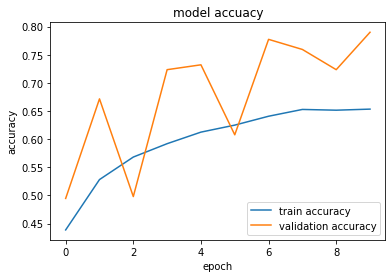

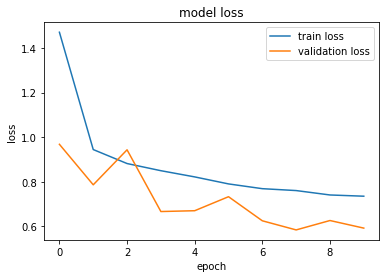

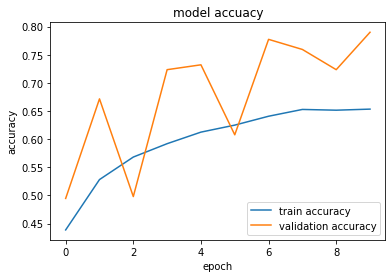

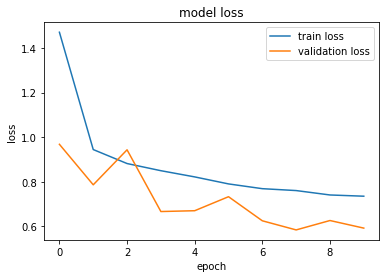

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()